# Data Science and Business Analytics

***Task 1: Prediction Using Supervised ML***

Predict the percentage of an student based on the no. of study hours.

**Author: Naveen Kumar**


In [2]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading data from remote location and Importing the Data**

In [3]:
#Reading the data from the url

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Overview**


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**We'll try to find any relationship between the data by plotting the data on 2D graph**

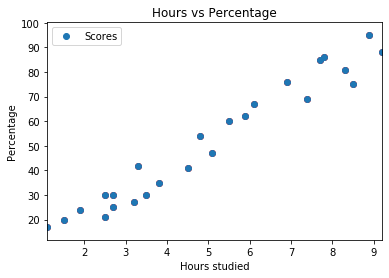

In [19]:
#plotting the distrubution of scores to find relationship between the data
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

We can see that there is positive linear relationship between the hours studied and percentage scored.


**Data preparation**

We'll divide the data into attributes and labels. Attribites are inputs and are independent variable. Labels are outputs and are dependent variables, whose values are to be predicted. Here, attribiutes will be 'Hours' and lables will be 'Scores'. 

In [11]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

We have divided the data into attributes and labels. Now, we'll split the data into training and test data using Scikit-Learn's built test_train_split() method. 

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Data is divided into 80% training data and 20% test data.

**Training the data**

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete")

Training complete


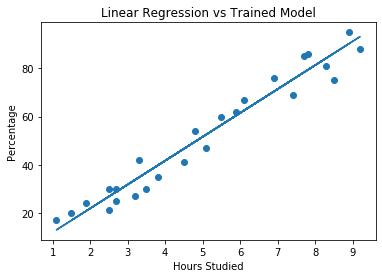

In [27]:
#plotting regression line
line = regressor.coef_*x+regressor.intercept_

#plotting test data
plt.title("Linear Regression vs Trained Model")
plt.scatter(x, y)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.plot(x, line)
plt.show()

**Predicting Scores**

 We have trained the data. Now, we'll make predictions. y_pred will contain the predicted values for the input x_test.


In [28]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Now, Comparing the actual vs predicted values.

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


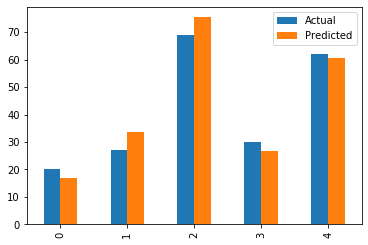

In [33]:
df.plot(kind='bar')

We can see that our model has predicted very closely.

**Predicting our own value**

In [38]:
hours = 9.25
hours_arr = np.array([9.25])
hours_arr = hours_arr.reshape(-1, 1)
score_pred = regressor.predict(hours_arr)
print("Number of hours studied = {}".format(hours))
print("Predicted score = {}".format(score_pred[0]))

Number of hours studied = 9.25
Predicted score = 93.69173248737538


**Evaluating the Model**
 
 This step will tell how well different algorithms will perform on dataset. 
 We'll use 1) Mean Absolute Error 2) Mean Squared Error

In [40]:
from sklearn import metrics

In [42]:
print("Mean Absolut Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

Mean Absolut Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
